<h1 style="color: #006400;"> Data Visualization </h1>
<h3 style="color: #8b5e3c;">Visualizing relationships between features using the ALSL and AccountLevel dataset</h3>

<p style="color: #8b5e3c;">Mathias Galvan</p>

<h2 style="color: #006400;"> Loading the Data </h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

acc_seat_game = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksDatasets/ALGLSL.csv')
acc_seat = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksDatasets/ALSL.csv')
acc = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksDatasets/AccountLevelFilled.csv')
seat = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksDatasets/SeatLevel.csv')

acc_seat_2024 = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksDatasets/ALGLSL_2024.csv')
acc_seat_2023 = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksDatasets/ALGLSL_2023.csv')
acc_seat_2024.head()

,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel
0,0,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,0,0,0,95.00,0,A,47.0,916.0,High,0
1,1,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,0,0,0,95.00,0,A,47.0,916.0,High,0
2,2,2024,34,2024-11-22 Indiana Pacers,2024-11-22,B,NaN,16274,2024,0,0,2,0,4.32,0,B,4.0,502.0,Medium,0
3,3,2024,34,2024-11-22 Indiana Pacers,2024-11-22,B,NaN,16274,2024,0,0,2,0,4.32,0,B,4.0,502.0,Medium,0
4,4,2024,60,2024-11-30 Washington Wizards,2024-11-30,D,NaN,16472,2024,1,0,0,0,6.00,1,D,17.0,936.0,Medium,0


<h2 style="color: #006400;"> FanSegment v GameTier</h2>


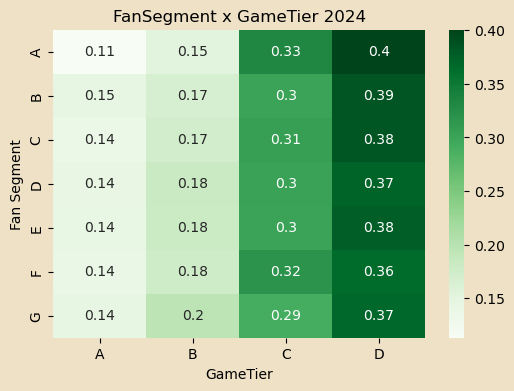

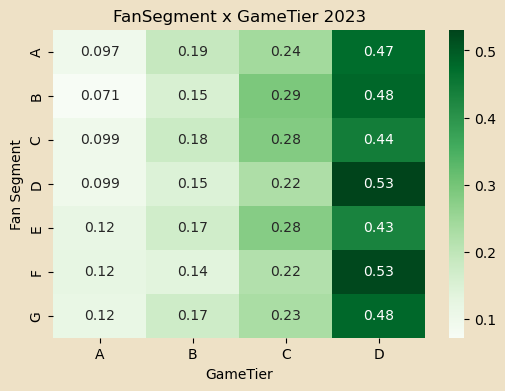

In [4]:
ct = pd.crosstab(acc_seat_2024['FanSegment'], acc_seat_2024['GameTier'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('FanSegment x GameTier 2024')
plt.xlabel('GameTier')
plt.ylabel('Fan Segment')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/segment_vs_gametier_2024_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

ct = pd.crosstab(acc_seat_2023['FanSegment'], acc_seat_2023['GameTier'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('FanSegment x GameTier 2023')
plt.xlabel('GameTier')
plt.ylabel('Fan Segment')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/segment_vs_gametier_2023_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


<h2 style="color: #006400;"> SocialMediaEngagement v GameTier</h2>

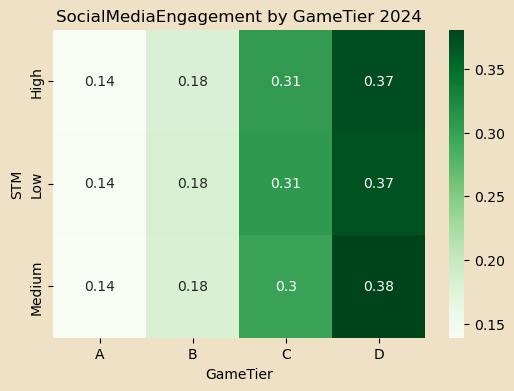

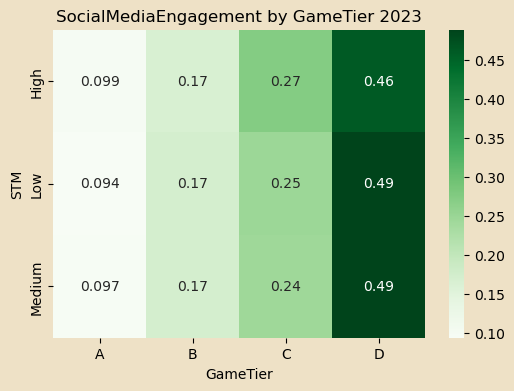

In [6]:
ct = pd.crosstab(acc_seat_2024['SocialMediaEngagement'], acc_seat_2024['GameTier'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('SocialMediaEngagement by GameTier 2024')
plt.xlabel('GameTier')
plt.ylabel('STM')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/smengagement_vs_gametier_2024_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

ct = pd.crosstab(acc_seat_2023['SocialMediaEngagement'], acc_seat_2023['GameTier'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('SocialMediaEngagement by GameTier 2023')
plt.xlabel('GameTier')
plt.ylabel('STM')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/smengagement_vs_gametier_2023_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


<h2 style="color: #006400;"> TicketPlans vs GameTier</h2>

In [8]:



def assign_ticket_flags(df : pd.DataFrame) -> pd.DataFrame:
    # pull the three totals
    n_group   = int(df['GroupTickets'].iloc[0])
    n_partial = int(df['PartialPlanTickets'].iloc[0])
    n_single  = int(df['SingleGameTickets'].iloc[0])
    total     = n_group + n_partial + n_single 
    index = 0

    for i in range(n_group):
        df.at[index, 'GroupTickets'] = 1
        index = index + 1

    for i in range(n_partial):
        df.at[index, 'PartialPlanTickets'] = 1
        index = index + 1
            
    for i in range(n_single):
        df.at[index, 'SingleGameTickets'] = 1
        index = index + 1
    return df

# 4) Apply it to each account
#spread_2024 = (acc_seat_2024.groupby('AccountNumber',axis=0, group_keys=False).apply(assign_ticket_flags))
#spread_2023 = (acc_seat_2023.groupby('AccountNumber',axis=0, group_keys=False).apply(assign_ticket_flags))


In [9]:

acc_seat_2024['GameTier'] = acc_seat_2024['GameTier'].astype('category')                                      
acc_seat_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419114 entries, 0 to 419113
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0.1           419114 non-null  int64   
 1   Season_x               419114 non-null  int64   
 2   AccountNumber          419114 non-null  int64   
 3   Game                   419114 non-null  object  
 4   GameDate               419114 non-null  object  
 5   GameTier               419114 non-null  category
 6   Giveaway               81453 non-null   object  
 7   Unnamed: 0             419114 non-null  int64   
 8   Season_y               419114 non-null  int64   
 9   SingleGameTickets      419114 non-null  int64   
 10  PartialPlanTickets     419114 non-null  int64   
 11  GroupTickets           419114 non-null  int64   
 12  STM                    419114 non-null  int64   
 13  AvgSpend               419114 non-null  float64 
 14  GamesAttended       

In [10]:
features = ['SingleGameTickets', 'GroupTickets', 'PartialPlanTickets']



#sns.boxplot(data=acc_seat_2024[acc_seat_2024['SingleGameTickets' != 0 ]], x='SingleGameTickets', y='GameTier')#, showfliers=False)
#plt.title('TicketPlan by GameTier 2024')
#plt.xlabel('GameTier')
#plt.ylabel('TicketPlan')
#plt.show()


<h2 style="color: #006400;"> SeasonTicketMember vs GameTier</h2>

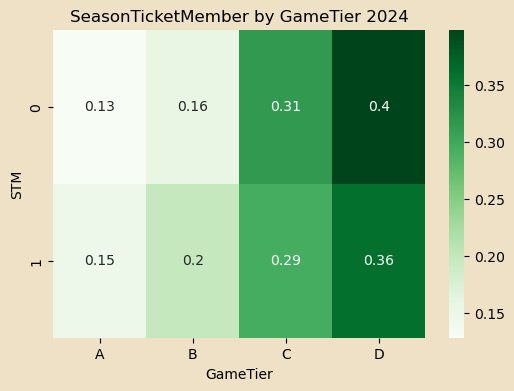

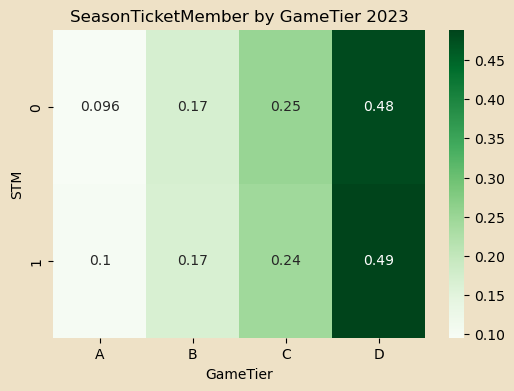

In [12]:
ct = pd.crosstab(acc_seat_2024['STM'], acc_seat_2024['GameTier'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('SeasonTicketMember by GameTier 2024')
plt.xlabel('GameTier')
plt.ylabel('STM')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/stm_vs_gametier_2024_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

ct = pd.crosstab(acc_seat_2023['STM'], acc_seat_2023['GameTier'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('SeasonTicketMember by GameTier 2023')
plt.xlabel('GameTier')
plt.ylabel('STM')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/stm_vs_gametier_2023_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


<h2 style="color: #006400;">DistanceToArena v GameTier</h2>

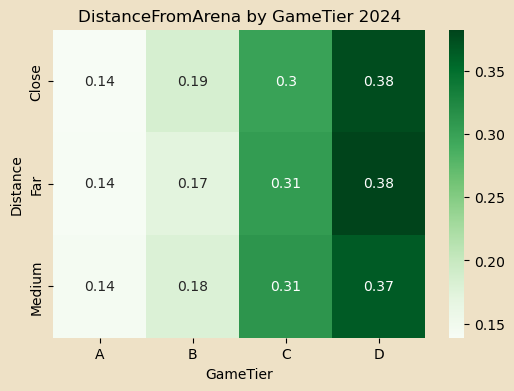

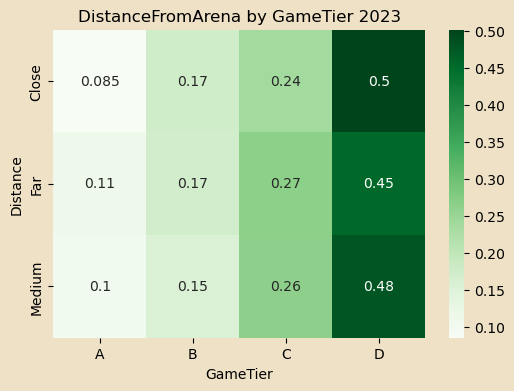

In [14]:
def distance_label(x):
    if x >= 80:
        return 'Far'
    elif x >= 40:
        return 'Medium'
    else:
        return 'Close'

acc_seat_2024['DistanceToArenaLabel'] = acc_seat_2024['DistanceToArena'].apply(distance_label)
acc_seat_2023['DistanceToArenaLabel'] = acc_seat_2023['DistanceToArena'].apply(distance_label)

ct = pd.crosstab(acc_seat_2024['DistanceToArenaLabel'], acc_seat_2024['GameTier'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('DistanceFromArena by GameTier 2024')
plt.xlabel('GameTier')
plt.ylabel('Distance')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/distance_vs_gametier_2024_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


ct = pd.crosstab(acc_seat_2023['DistanceToArenaLabel'], acc_seat_2023['GameTier'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('DistanceFromArena by GameTier 2023')
plt.xlabel('GameTier')
plt.ylabel('Distance')
plt.savefig(f"/Users/galvanm/python/BucksHackathon25/BucksPlots/distance_vs_gametier_2023_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


<h2 style="color: #006400;">BasketballPropensity v GameTier</h2>

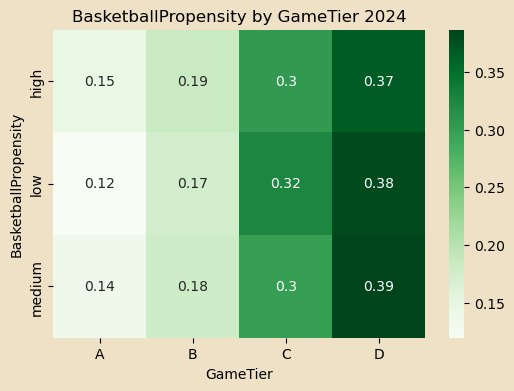

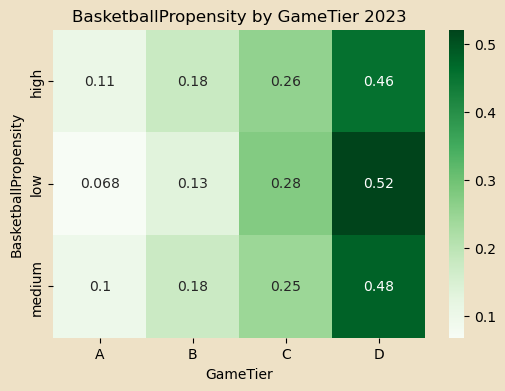

In [16]:
def propensity_label(x):
    if x >= 800:
        return 'high'
    elif x >= 400:
        return 'medium'
    else:
        return 'low'

acc_seat_2024['BasketballPropensityLabel'] = acc_seat_2024['BasketballPropensity'].apply(propensity_label)
acc_seat_2023['BasketballPropensityLabel'] = acc_seat_2023['BasketballPropensity'].apply(propensity_label)

ct = pd.crosstab(acc_seat_2024['BasketballPropensityLabel'], acc_seat_2024['GameTier'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('BasketballPropensity by GameTier 2024')
plt.xlabel('GameTier')
plt.ylabel('BasketballPropensity')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_gametier_2024_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

ct = pd.crosstab(acc_seat_2023['BasketballPropensityLabel'], acc_seat_2023['GameTier'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('BasketballPropensity by GameTier 2023')
plt.xlabel('GameTier')
plt.ylabel('BasketballPropensity')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_gametier_2023_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

<h2 style="color: #006400;">FanSegment v GamesAttended</h2>

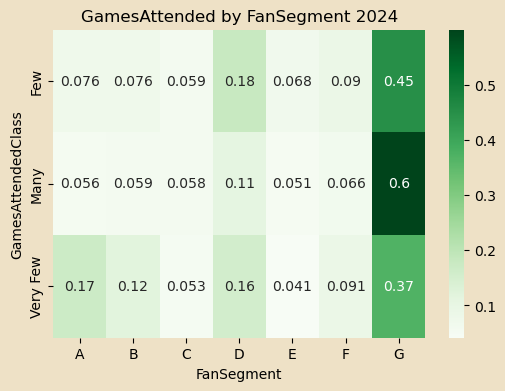

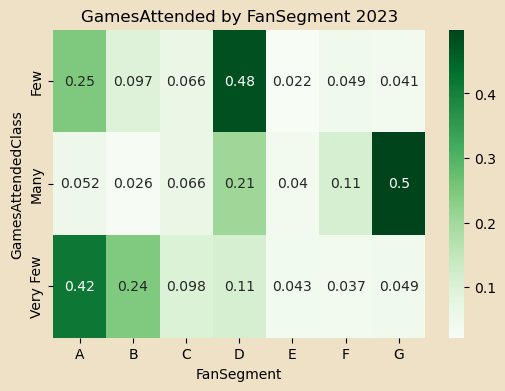

In [37]:
def games_attended_label(x):
    if x >= 5:
        return 'Many'
    elif x >= 3:
        return 'Few'
    else:
        return 'Very Few'

acc_seat_2024['GamesAttendedClass'] = acc_seat_2024['GamesAttended'].apply(games_attended_label)
acc_seat_2023['GamesAttendedClass'] = acc_seat_2023['GamesAttended'].apply(games_attended_label)

ct = pd.crosstab(acc_seat_2024['GamesAttendedClass'], acc_seat_2024['FanSegment'])


rownorm = ct.div(ct.sum(axis=1),axis=0)

scaled_ct = pd.DataFrame(scaler.fit_transform(ct), index=ct.index, columns=ct.columns)

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('GamesAttended by FanSegment 2024')
plt.xlabel('FanSegment')
plt.ylabel('GamesAttendedClass')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_vs_segment_2024_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

ct = pd.crosstab(acc_seat_2023['GamesAttendedClass'], acc_seat_2023['FanSegment'])

fig, ax = plt.subplots(figsize=(6,4))

fig.patch.set_facecolor('#EEE1C6') 

rownorm = ct.div(ct.sum(axis=1),axis=0)

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('GamesAttended by FanSegment 2023')
plt.xlabel('FanSegment')
plt.ylabel('GamesAttendedClass')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_vs_segment_2023_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


In [19]:
acc_seat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531341 entries, 0 to 531340
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Season_x               531341 non-null  int64  
 1   AccountNumber          531341 non-null  int64  
 2   SingleGameTickets      531341 non-null  int64  
 3   PartialPlanTickets     531341 non-null  int64  
 4   GroupTickets           531341 non-null  int64  
 5   STM                    531341 non-null  int64  
 6   AvgSpend               531341 non-null  float64
 7   GamesAttended          531341 non-null  int64  
 8   FanSegment             531341 non-null  object 
 9   DistanceToArena        511450 non-null  float64
 10  BasketballPropensity   441090 non-null  float64
 11  SocialMediaEngagement  531341 non-null  object 
 12  Season_y               531341 non-null  int64  
 13  Game                   531341 non-null  object 
 14  GameDate               531341 non-nu

<h3 style="color: #006400;">Giveaway v FanSegment</h3>

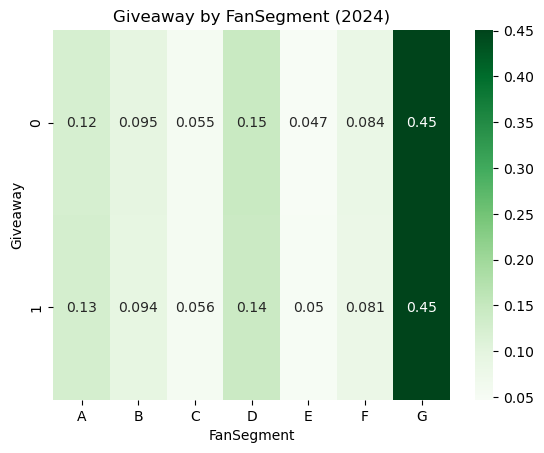

In [21]:
ct = pd.crosstab(acc_seat_2024['GiveawayLabel'], acc_seat_2024['FanSegment'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('Giveaway by FanSegment (2024)')
plt.xlabel('FanSegment')
plt.ylabel('Giveaway')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/giveaway_vs_segment_heatmap_2024.png", dpi=300, bbox_inches='tight')
plt.show()

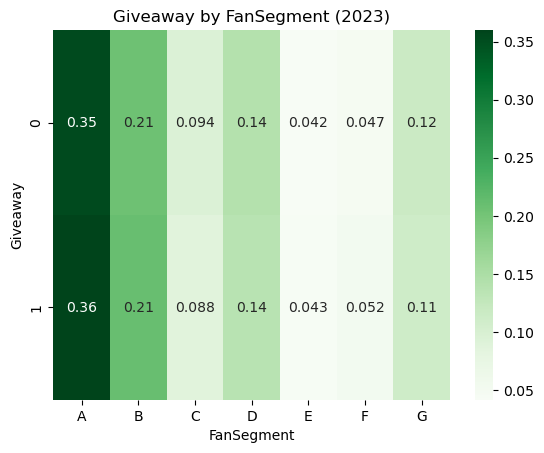

In [22]:
ct = pd.crosstab(acc_seat_2023['GiveawayLabel'], acc_seat_2023['FanSegment'])

rownorm = ct.div(ct.sum(axis=1),axis=0)

scaled_ct = pd.DataFrame(scaler.fit_transform(ct), index=ct.index, columns=ct.columns)
sns.heatmap(rownorm, annot=True, cmap='Greens')
plt.title('Giveaway by FanSegment (2023)')
plt.xlabel('FanSegment')
plt.ylabel('Giveaway')
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/giveaway_vs_segment_heatmap_2023.png", dpi=300, bbox_inches='tight')
plt.show()